# **Speed Dating**

In this project, we study the data obtained during a speed dating experiment. On a weekly basis between 2002 and 2004, small groups of males and females were involved weekly in heterosexual speed dating sessions. The data was collected in a survey before, during and after the actual dating session. The data was the basis of (at least) two papers[^1]:
* Raymond Fisman, Sheena S. Iyengar, Emir Kamenica and Itamar Simonson, <em>Gender Differences in Mate Selection: Evidence from a Speed Dating Experiment</em>. The Quarterly Journal of Economics, Vol. 121, No. 2 (May, 2006), pp. 673-697. DOI: [10.1162/qjec.2006.121.2.673](https://doi.org/10.1162/qjec.2006.121.2.673)
* Raymond Fisman, Sheena S. Iyengar, Emir Kamenica and Itamar Simonson, <em>Racial Preferences in Dating</em>. The Review of Economic Studies, Vol. 75, No. 1 (Jan., 2008), pp. 117-132. DOI: [10.1111/j.1467-937X.2007.00465.x](https://doi.org/10.1111/j.1467-937X.2007.00465.x)

!!! Give some context

Although the articles' titles give us hints on what to look for in this dataset, we will focus on understanding <strong>what makes people interested in each other</strong>. In this context, the retained metric to assess the interest in someone is the *like*.

The analysis carried here is divided in three parts. We first load the data, get some insights on their content, and make a first preprocessing. We then provide descriptive statistics about the subjects involved in this experiment: age, race, income, self-assessed interests and attributes, etc. Finally, we delve in the analysis of the dating results: attractiveness, attribute and racial preferences.


Contents
--------
1. [Loading and preprocessing of the dataset](#loading)
2. [Single-subject data analysis](#subjects)
3. [Dating results analysis](#dating)
4. [Conclusion and perspectives](#conclusion)


[^1]: I did not rely on the articles' analysis in this project.

## <a name="loading"></a>Loading and preprocessing the dataset

Before moving on to data analysis, we load and prepare the data.
* The file contains a `\x8e` byte. It should be interpreted as "é" (LATIN SMALL LETTER E WITH ACUTE), corresponding to `mac_roman` encoding.
* The floats in the raw dataset have format `xxx,xxx.xx`, we specify `thousands=',', decimal='.'` to load the values properly

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fname = "./Speed+Dating+Data.csv"
df = pd.read_csv(fname, encoding='mac_roman', thousands=',', decimal='.')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In the following data analysis, we shall distinguish single-subject data (`'age'`, `'income'`, `'gender'`, etc) and dating data (`'dec'`, `'age_o'`, etc). We first address the case of single-subject data and produce a reduced dataframe which contains only subject-related data.

Subjects are distinguished by their `'iid'`. If for a given `'iid'`, an entry has a single value, then it must pertain to the subject. For instance, for `iid = 1`, the column `'age'` has all its rows with value `21`. Since this is true for all `iid`s, we can deduce that the entry `'age'` pertains to the subject and not to the dating.

In [ ]:
# for each iid (participant), unique value => entry pertains to the subject
subject_entries = df.groupby('iid').nunique().max() <= 1
# re-insert iid
subject_entries = pd.concat([pd.Series([True], index=['iid']), subject_entries])
### multiple values => entry pertains to dating
### partner_entries = ~subject_entries

subject_cols = df.columns[subject_entries]
subject_df = df[subject_cols].groupby('iid').aggregate(lambda x: x.iloc[0])
subject_df

,id,gender,idg,condtn,wave,round,age,field,field_cd,undergra,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,,,,,,,,,,,,,,,,,,,,,
1,1.0,0,1,1,1,10,21.0,Law,1.0,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,2.0,0,3,1,1,10,24.0,law,1.0,NaN,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
3,3.0,0,5,1,1,10,25.0,Economics,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0,7,1,1,10,23.0,Law,1.0,NaN,...,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
5,5.0,0,9,1,1,10,21.0,Law,1.0,NaN,...,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,18.0,1,36,2,21,22,30.0,Business,8.0,"University of Cologne, Germany",...,8.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,9.0,7.0
549,19.0,1,38,2,21,22,28.0,General management/finance,8.0,"LUISS, Rome",...,7.0,9.0,8.0,7.0,8.0,5.0,8.0,8.0,6.0,8.0
550,20.0,1,40,2,21,22,30.0,MBA,8.0,Oxford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <a name="single-subject"></a>Single-subject data analysis

We first begin by providing some insights on the participants to these sets of speed-dataing studies. In this section, we will explore the following:
- Age, race and income distributions
- Racial statistics
- The average subject in terms of interests (self assessed)
- The average subject in terms of attributes (self assessed)
- The ideal partner for both males and females participants in terms of attributes


However, the vast amount of features provided force us to limit ourselves to a part of the data. We will therefore ignore:
- Location features (`'from'`, `'zipcode'`). These fields have many distinct values (406 zipcodes for instance), making it difficult to aggregate the values to compute statistics. Moreover they should be converted to geographical coordinates prior to being included in the analysis. These are nevertheless indirectly included in the analysis through the `'income'` feature which we assume shares much of the information brought by the location.
- Studies and career features (`'field'`, `'undergrd'`, `'career'`, `'tuition'`, etc). As above, the `'income'` is a good proxy for all these quantities.
- Attitude towards dating (`'goal'`, `'date'`, `'go_out'`, `'exphappy'`). The answers here are not quantitative, and their relation to attractiveness in dating is unclear. Nevertheles, such questions could be used by researchers to determine which participants are not answering honestly to the questionnaire.
- Dating followup (`'you_call'`, `'them_cal'`, `'date_3'`, `'numdat_3'`, `'num_in_3'`)). Only limited information is available

#### Age and income distributions

`'age'` and `'income'` are the only two quantitative entries that have more than half the dataset size with non-null values. Moreover, they have an easy interpretation. Their distribution is shown in the following figure. Note that the income distribution is biased since, as indicated in the explanatory document:
> When there is no income it means that they are either from abroad or did not enter their zip code.

Foreigners income, which is probably different than that of americans, is thus not represented in the distribution. 

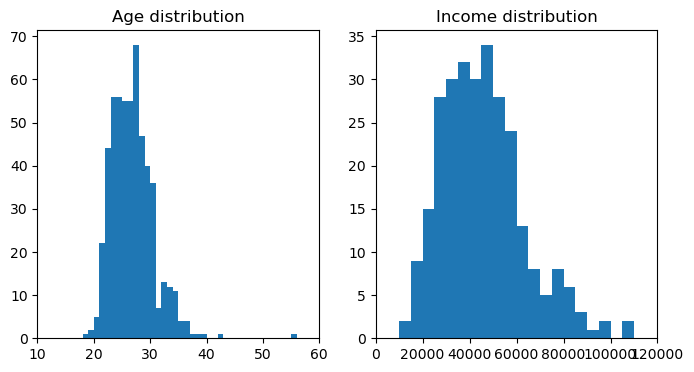

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].hist(subject_df['age'], bins=np.linspace(10, 60, 51))
ax[0].set_xlim(10, 60)
ax[0].set_title("Age distribution")

ax[1].hist(subject_df['income'], bins=np.linspace(1e4, 1.2e5, 23))
ax[1].set_xlim(0, 1.2e5)
ax[1].set_title("Income distribution")

plt.show()

#### Racial statistics



In [ ]:
racial_df = subject_df.loc[:, ['race', 'gender', 'age', 'income']]

#### Interests

Note that this representation does not capture the correlations between interests.

In [ ]:
interests = ['sports', 'tvsports', 'exercise', 'dining','museums',
             'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
             'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
interests_df = subject_df.loc[:, interests]

#### Attributes

That one is more complex

#### Ideal partner in terms of attributes

## <a name="dating"></a>Dating results analysis

## <a name="perpectives"></a>Perspectives

Possible extensions with more data/more precise data.
- What I think I look for vs what I actually look for
- Zipcode : do people prfer those who live closer
- Sex orientation